# Carvago - Data Exploration

## Introduction

Data set used in this project comes from website carvago.com, belonging to the company of the same name which speciallizes in reselling of used cars between different Europena countries. It was downloaded on 24th of March 2023 and contains over 650 000 observations of used cars with 29 attributes.  

In [118]:
#libraries
import math
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import seaborn as sns
from functions import *
from matplotlib.dates import DateFormatter

In [189]:
#graphics set up
#single plot set up
fig_width = 12
fig_height = 12
##grid plots set up
fontsize_grid = 30
y_grid = 0.93
 

In [119]:
#read data
data = pd.read_csv("../data/car_data.csv")
data.head()

,id,title,cubic_capacity,power,number_of_seats,fuel_type,transmission,fuel_consumption_combined,carbon_dioxide_emission,drive,...,color,manufacture_date,external_id,price,model,features_all,brand,seller_type,seller_country,seller_rating
0,54408847,Mitsubishi Space Star 52 kW,1193.0,52.0,5.0,Petrol,Manual,4.5,104.0,4x2,...,White,2022-12-01,mobile_de-357402368,361990,Space Star,"['MP3 interface', 'Power assisted steering', '...",Mitsubishi,Dealership,Germany,4.6
1,53378726,Volkswagen Caddy Combi 1.6 TDI BlueMotion Tech...,1598.0,75.0,5.0,Diesel,Automatic,5.2,136.0,4x2,...,White,2014-07-01,autoscout24-71aa69f3-20a5-4028-8333-3bcf112b703f,305490,Caddy,"['Power assisted steering', 'ABS', 'ESP', 'Tra...",Volkswagen,Used cars seller,Belgium,4.5
2,54227793,Volkswagen Polo 1.2 TSI Lounge 66 kW,1197.0,66.0,5.0,Petrol,Manual,4.7,107.0,4x2,...,Brown,2015-10-01,mobile_de-360085596,328990,Polo,"['Sport package', 'Power assisted steering', '...",Volkswagen,Dealership,Germany,4.7
3,54565397,Citroen C5 Tourer HDi 165 FAP Automatic 120 kW,1997.0,120.0,5.0,Diesel,Automatic,6.9,179.0,4x2,...,Blue,2010-12-01,autoscout24-eeef32e4-cff3-4df5-bc51-d1d36575d32e,120490,C5,"['MP3 interface', 'Sport package', 'Power assi...",Citroën,Used cars seller,Germany,5.0
4,53497768,Ford EcoSport 1.0 92 kW,1000.0,92.0,5.0,Petrol,Manual,6.0,134.0,4x2,...,Grey,2017-10-01,mobile_de-358352862,401490,EcoSport,"['MP3 interface', 'Power assisted steering', '...",Ford,Dealership,Germany,4.9


In [174]:
#constants
date_download = datetime.datetime(2023, 3, 24) #date on which the data set was downloaded 
month_download = datetime.datetime(2023, 3, 1)
## categorical variables to be showed in plots
cat_cols_grid = ['fuel_type', 'transmission', 'drive', 'car_style',
                'emission_class', 'door_count', 'color', 'seller_type', 'seller_country', 'number_of_seats', 'number_of_owners']
numerical_cols_grid = ['cubic_capacity', 'power', 'number_of_seats',
                        'fuel_consumption_combined', 'carbon_dioxide_emission', 'mileage', 'price']

## Data Types

In [121]:
#types of variables
print("number of attributes: " + str(len(data.columns)))
data_types = data.dtypes.to_frame()
data_types.columns = ["data_type"]
print(data_types)
#counts of different types of variables
data_types_counts = data_types.value_counts()
print("Type Counts: ")
print(data_types_counts)

number of attributes: 29
                          data_type
id                            int64
title                        object
cubic_capacity              float64
power                       float64
number_of_seats             float64
fuel_type                    object
transmission                 object
fuel_consumption_combined   float64
carbon_dioxide_emission     float64
drive                        object
car_style                    object
emission_class               object
equipment_version            object
door_count                   object
model_edition                object
created_at                   object
registration_date            object
mileage                       int64
number_of_owners            float64
color                        object
manufacture_date             object
external_id                  object
price                         int64
model                        object
features_all                 object
brand                        object
sel

In the data set there are available 29 different attributes for the analysis. We have info on car brand and model, technical attributes (power, cubic_capacity, ...), mileage of the vehicle, its fuel consumption, month of the manufacturing and registration and other attributes. We can see that 10 of the variables have numeric values, some of the remaining variables can be transformed into nuemrical variables because they have either only two categories (transmission) but still there seems to be a lot of categorical variables. 

## Missing values

In [122]:
data.shape[1]
n_NA = data.isna().sum().to_frame()
n_NA.columns = ["NA_count"]
n_NA['(%)'] = (n_NA['NA_count']/ data.shape[0]) * 100
n_NA

,NA_count,(%)
id,0,0.000000
title,0,0.000000
cubic_capacity,29567,4.394450
power,1,0.000149
number_of_seats,36982,5.496518
fuel_type,0,0.000000
transmission,0,0.000000
fuel_consumption_combined,20992,3.119975
carbon_dioxide_emission,58,0.008620
drive,0,0.000000


## Categorical Variables 

In [123]:
cat_vars = data_types[data_types["data_type"] == "object"].index
carmaker_min = 5000

### Unique Categories

In [124]:
df_cat_unique_vals = pd.DataFrame()
df_cat_unique_vals["unique_vals"] = data[cat_vars].apply(lambda col: col.unique())
df_cat_unique_vals["n_unique"] = data[cat_vars].apply(lambda col: len(col.unique()))
df_cat_unique_vals


,unique_vals,n_unique
title,"[Mitsubishi Space Star 52 kW, Volkswagen Caddy...",36857
fuel_type,"[Petrol, Diesel, Electric, Hybrid, LPG, CNG, O...",9
transmission,"[Manual, Automatic]",2
drive,"[4x2, 4x4, Front wheel drive]",3
car_style,"[Compact, MPV/VAN, Station Wagon, SUV / offroa...",11
emission_class,"[Euro 6d, Euro 5, Euro 6, No emission class, E...",11
equipment_version,"[nan, Lounge, Executive, Tekna, Line, Easy, TI...",917
door_count,"[4/5 doors, nan, 2/3 doors, 6/7 doors]",4
model_edition,"[1.0, Combi 1.6 TDI BlueMotion Technology Comf...",6275
created_at,"[{'date': '2023-02-24 01:52:06.000000', 'timez...",130827


Looking more closely on the individual values of categorical variables in the data set there is only 1 column with only 2 categories. So for the most of them, in the case we want to use them in a model that does not support categorical variables directly (OLS..) we will be forced to either restrict the data set to only few selected values or transform them into  dummy variables.  

### Variables Distributions

### Car Makers

c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: title={'center': 'Car Makers by their Share in the Data Set'}, xlabel='brand', ylabel='share'>

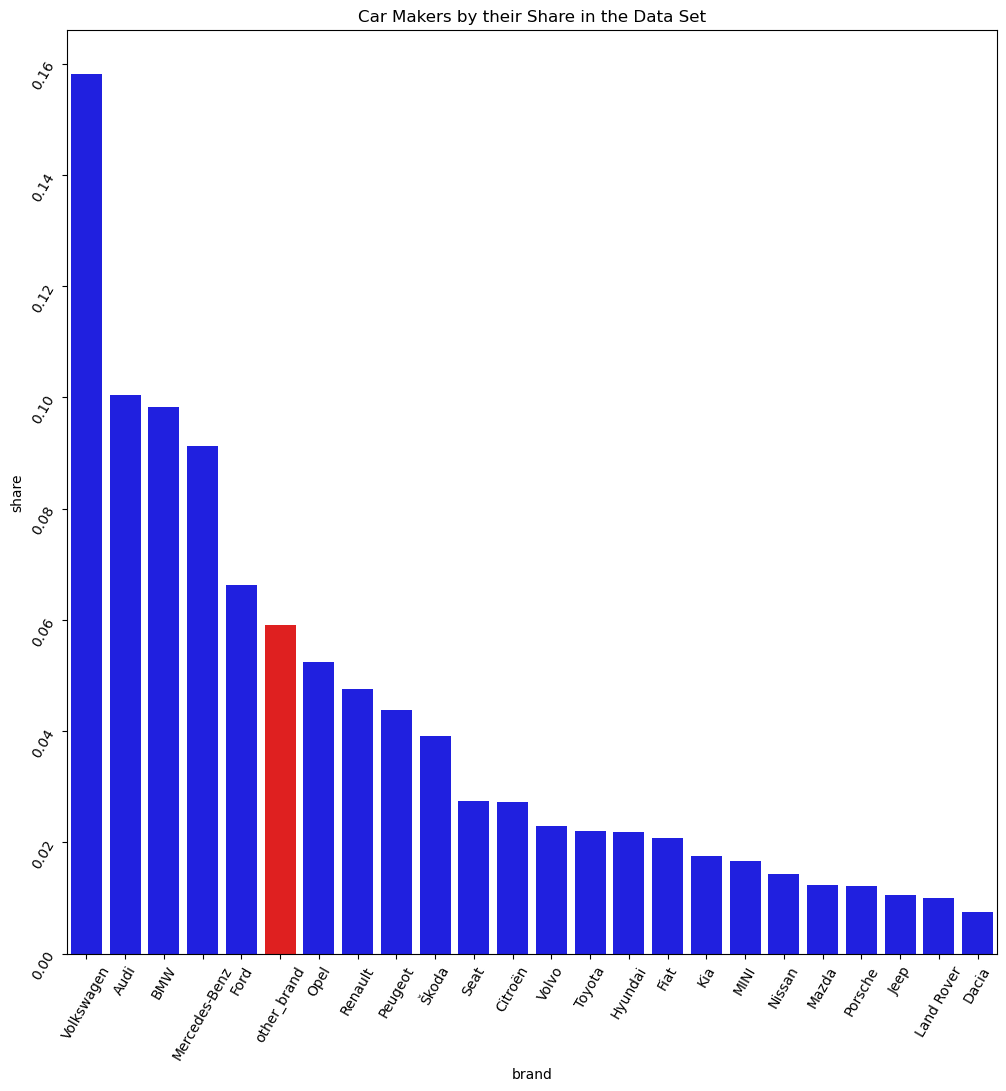

In [198]:
carmakers_df =  create_share_df(df=data, col="brand", min_threshold=carmaker_min, color="blue", color_other="red")
fig,ax = plt.subplots(figsize=(fig_width, fig_height))
ax.set_title("Car Makers by their Share in the Data Set")
ax.tick_params(labelrotation=60)
sns.barplot(data=carmakers_df, x=carmakers_df.index, y="share",palette=carmakers_df["colours"], ax=ax)

Looking at the barplot with shares of individual carmakers, we can see that they are not really proportional. Over 40 % observations in the data set belong to 4 major German carmakers - Volkswagen, Audi, BMW and Mercedes-Benz. There are 18 other car brands with at least 5000 observations (0.007 share in the dataset) and 6 % of the observations belong to other car makers with smaller number of osbervations. 

### Other Categorical Variables

c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

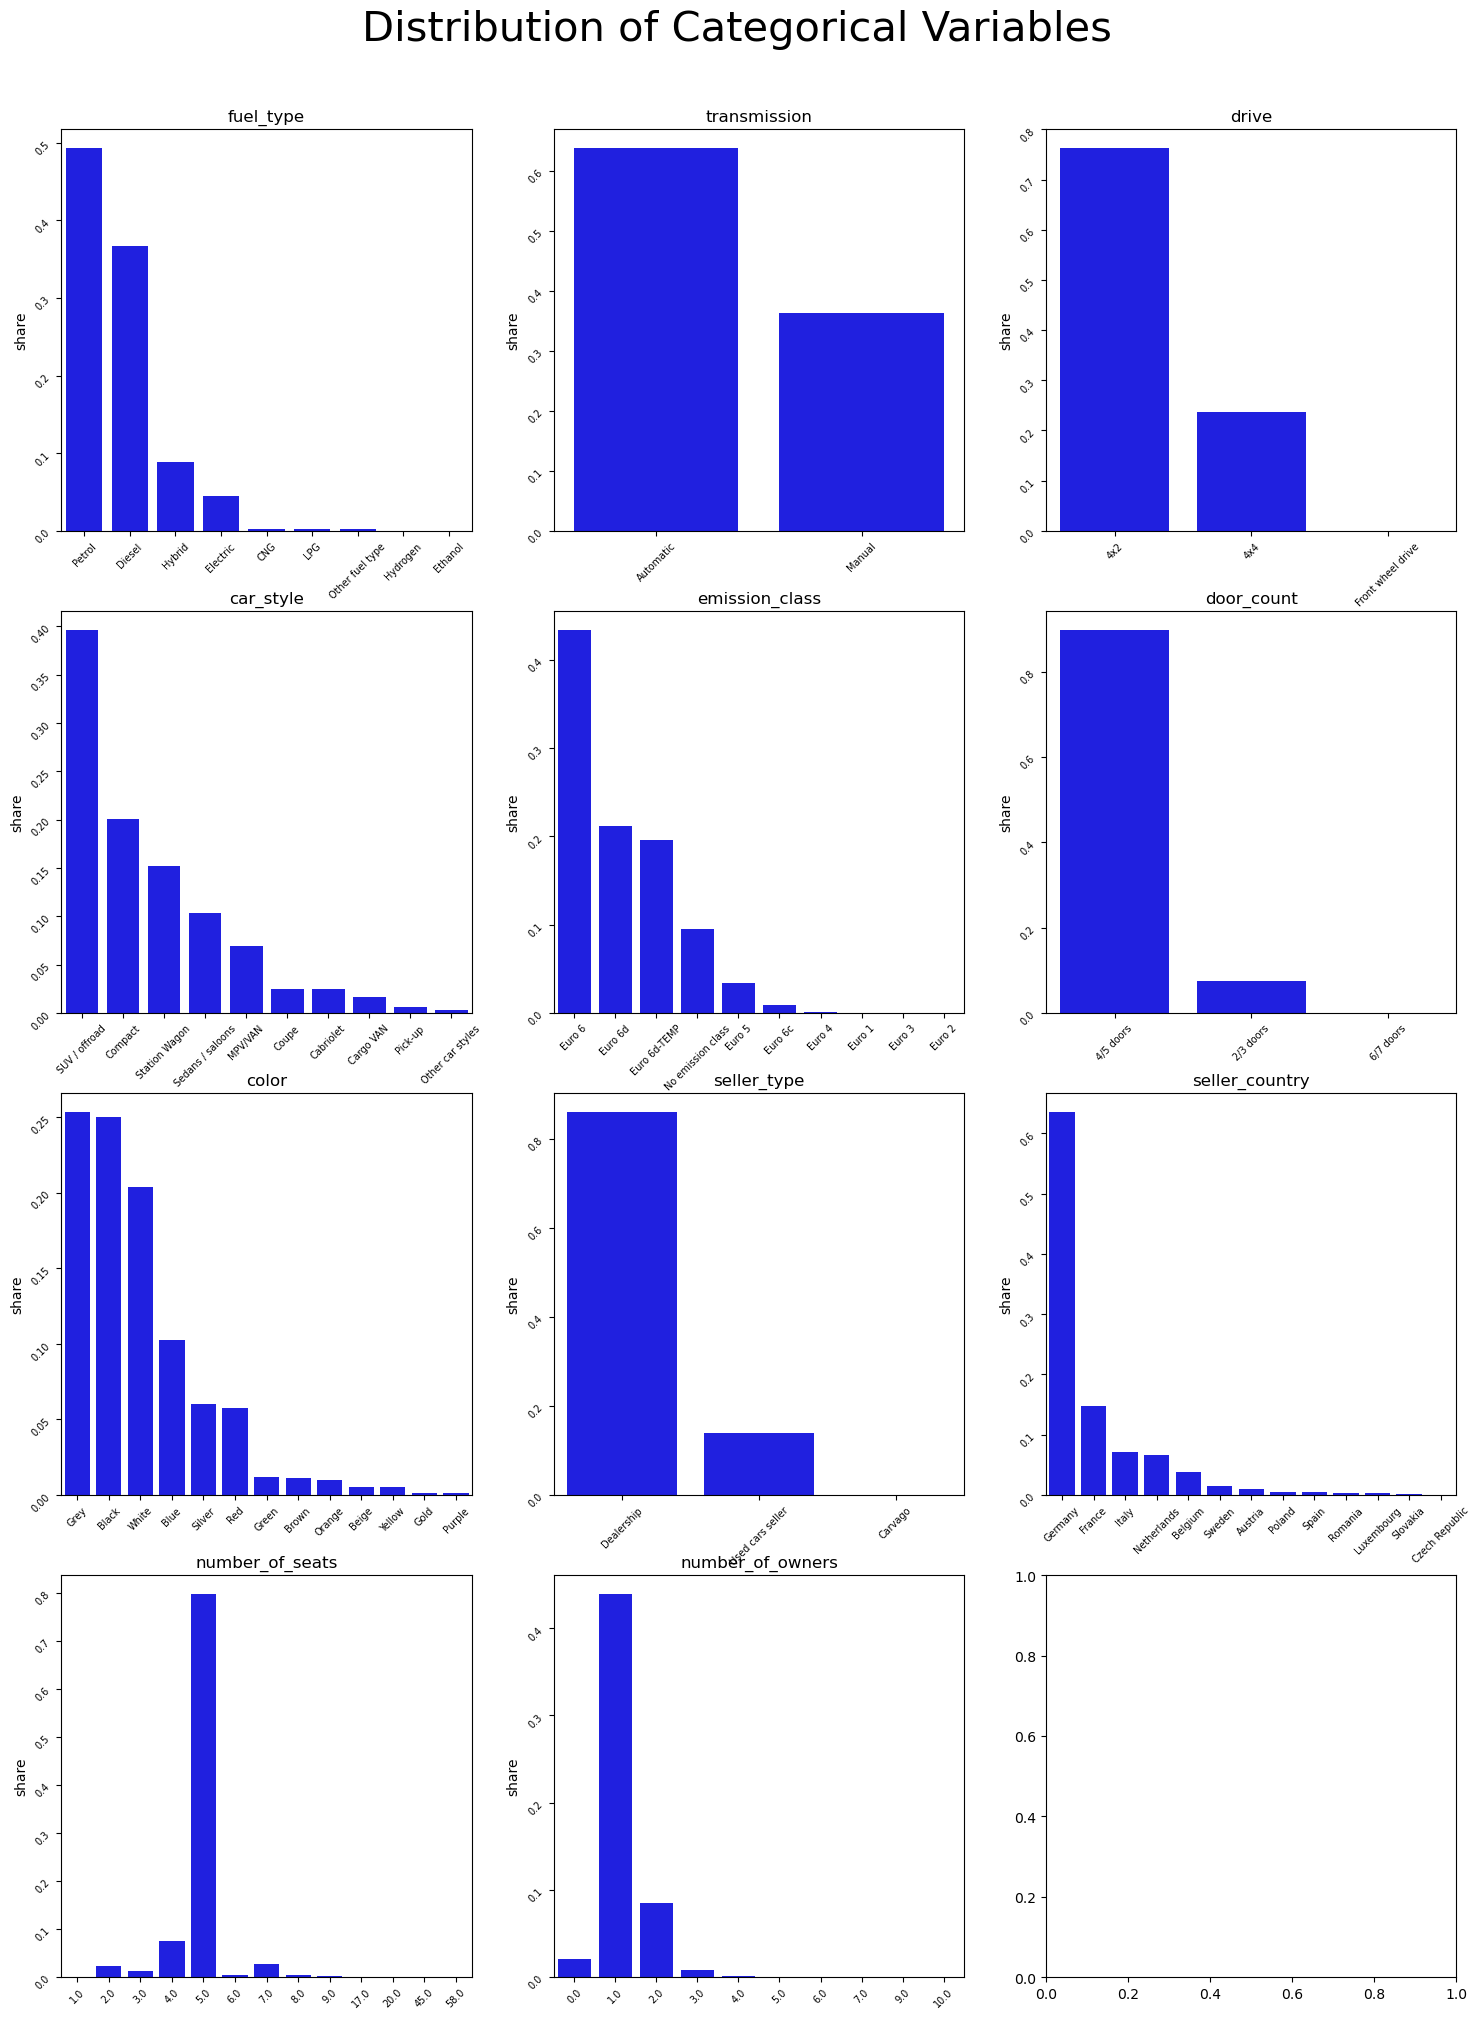

In [203]:
n_rows = math.ceil(len(cat_cols_grid) / 3)
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 24))
fig.suptitle(
    'Distribution of Categorical Variables', 
    fontsize=fontsize_grid, 
    y=y_grid)
row_ind = 0
col_ind = -1
for ind in range(len(cat_cols_grid)):
    row_ind = math.floor(ind / 3)
    col_ind += 1 
    df_share = create_share_df(
    df=data, 
    col=cat_cols_grid[ind]
    )
    sns.barplot(data=df_share, 
                x=df_share.index, 
                y="share", 
                color="blue",
                ax=axes[row_ind, col_ind])
    axes[row_ind, col_ind].set_xlabel(None)
    axes[row_ind, col_ind].tick_params(labelsize=7, labelrotation=45)
    axes[row_ind, col_ind].set_title(cat_cols_grid[ind])
    if col_ind == 2:
        col_ind = -1

Firstly, looking at the types of fuels of cars in the data set, most of the cars have engines fueld by exhaustion engines (almost 85 % of all observations), slight majority of cars have automatic tranmission. Almost 80 % of the cars has 2 wheel drive. Maybe a little bit suprisingly almost 40 % vehicles are off road/SUV vehicles, station wagons compacts and saloons have then together slightly over 45% share. Nevertheless, the SUV cars are gaining popularity in last few years and this number actually corresponds quite closely to how many newly registred cars are of this type. Share of observations according to their car count also seem to be reasonable, most of the cars should be expected to have 4 or 5 doors because 2 vehicles are more typical for sport cars which should be naturally in a minority in our data set, similairly cars which have more than 5 doors are not found on the roads in high numbers. In regars to colour of cars in oru data set, the share also correponds quite closely to the actual situation on Czech roads, most of the cars are either black, white or grey (together approximately 70% share). 

### Month of Registration and Month of Manufacture

Text(0.5, 1.0, 'Distribution of Registration Dates')

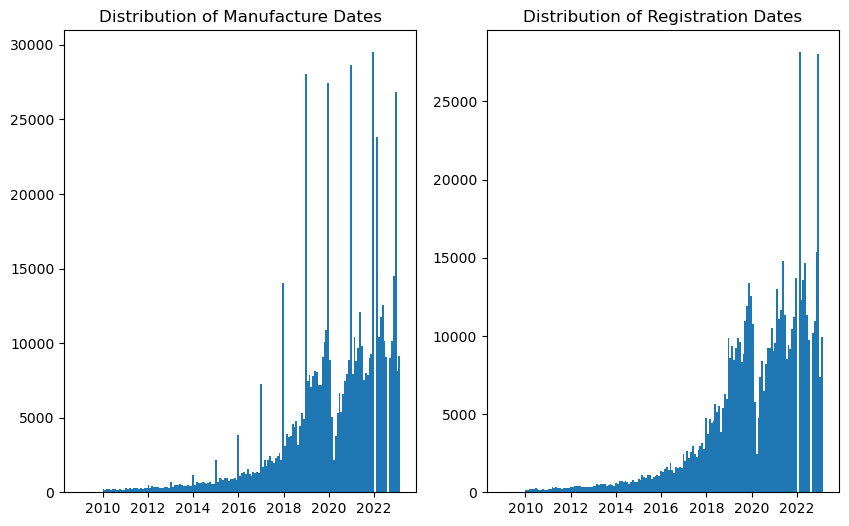

In [128]:
fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=2)
years_fmt = DateFormatter('%Y')
data['manufacture_date'] = pd.to_datetime(data['manufacture_date'])
data['manufacture_date_m'] = data['manufacture_date'].dt.to_period('M').dt.to_timestamp()
ax[0].hist(data['manufacture_date_m'], bins=len(data['manufacture_date_m'].unique()), label='Value')
ax[0].set_title("Distribution of Manufacture Dates")


data['registration_date'] = pd.to_datetime(data['registration_date'])
data['registration_date_m'] = data['registration_date'].dt.to_period('M').dt.to_timestamp()
ax[1].hist(data['registration_date_m'], bins=len(data['registration_date_m'].unique()), label='Value')
ax[1].set_title("Distribution of Registration Dates")

We can see that majority of the cars in the data set are less than 5 years old at the time the data set was downloaded. At the first look it seems that the distributions of both variables are very similair.

In [129]:
#fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
data["man_reg_diff"] = (data['registration_date'] - data['manufacture_date']).dt.days
print(data["man_reg_diff"].value_counts().head(10))
print("Correlation between date of registration and date of manufacturing: ")
print(data["manufacture_date"].corr(data['registration_date']))



man_reg_diff
0      577649
272       868
58        815
180       764
333       760
150       757
363       749
88        706
89        694
332       689
Name: count, dtype: int64
Correlation between date of registration and date of manufacturing: 
0.9953875380177796


We can also look more closely on the relationship between date of manufacture and vehicle registration by looking on the distribution of difference between these two dates in days. At the first look it can be seen that in most cases these two days are identical which is also supported in correlation coefficient between these two date which is close to 1, so it seems that it makes sense to choose only on e of the variable for the vehicle price prediction because they both containt almost indetical information. Howerever, this finding also rises a question about the quality of the data at least in this concrete regard because it is obviously impossible that all the cars were registered the day there were manufactured.  

Number of cars less than 6 months old: 58616


Text(0.5, 1.0, 'Distribution of Used Cars in the Last 6 Months')

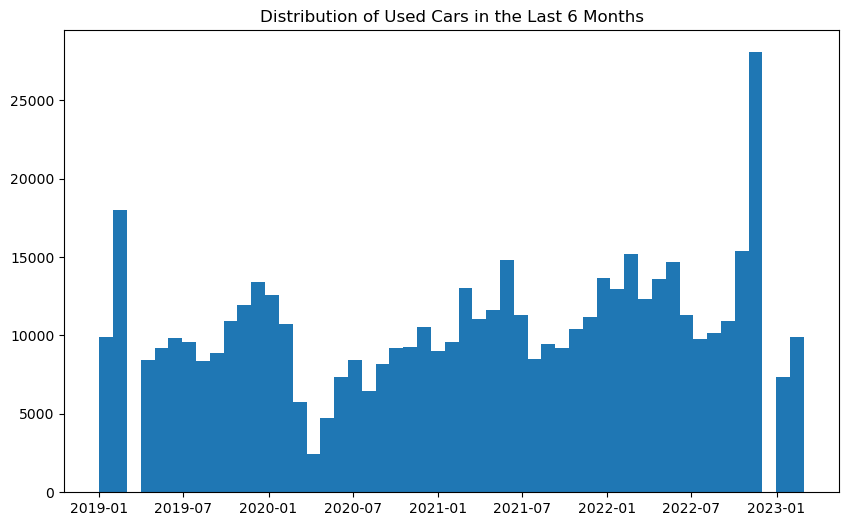

In [143]:
data["vehicle_age"] = (date_download - data['manufacture_date']).dt.days
fig, ax = plt.subplots(figsize=(10, 6), nrows=1, ncols=1)
ax.hist(data['registration_date_m'][data['registration_date_m'].dt.year > 2018], bins=len(data['registration_date_m'][data['registration_date_m'].dt.year > 2018].unique()))
date_6_months = date_download - datetime.timedelta(days=150)
n_6months = data[data["manufacture_date"] > date_6_months].shape[0]
print("Number of cars less than 6 months old: " + str(n_6months))
ax.set_title("Distribution of Used Cars in the Last 6 Months")

Looking more closely on the distrubution of observations since the beginning of 2019, we can see that there is overpresentation of very new cars, less than 6 months old, which rises a question if these cars can be thought of as used car in the sense that they share the same determinants of their prices.   

## Numeric Variables

In [10]:
data.describe()

,id,cubic_capacity,power,number_of_seats,fuel_consumption_combined,carbon_dioxide_emission,registration_date,mileage,number_of_owners,manufacture_date,price,seller_rating
count,6.728260e+05,643259.000000,672825.000000,635844.000000,651834.000000,672768.000000,672826,672826.000000,372294.000000,672826,6.728260e+05,512215.000000
mean,5.344757e+07,1760.318540,128.505042,4.908529,5.695248,125.463684,2020-04-15 16:29:29.838858752,40339.856209,1.148348,2020-03-21 21:00:00.802584832,8.826471e+05,4.510295
min,3.898200e+04,0.000000,4.000000,1.000000,0.000000,0.000000,2009-01-01 00:00:00,0.000000,0.000000,2009-01-01 00:00:00,6.699000e+04,0.000000
25%,5.292960e+07,1332.000000,85.000000,5.000000,4.600000,109.000000,2019-03-01 00:00:00,10548.000000,1.000000,2019-01-01 00:00:00,5.229900e+05,4.500000
50%,5.409812e+07,1598.000000,110.000000,5.000000,5.100000,125.000000,2020-10-01 00:00:00,29500.000000,1.000000,2020-10-01 00:00:00,7.199900e+05,4.700000
75%,5.459235e+07,1993.000000,143.000000,5.000000,6.100000,147.000000,2022-02-01 00:00:00,60600.000000,1.000000,2022-01-01 00:00:00,1.009990e+06,4.800000
max,5.487552e+07,83590.000000,588.000000,58.000000,809.000000,1258.000000,2023-03-01 00:00:00,175000.000000,10.000000,2023-03-01 00:00:00,1.249199e+07,5.000000
std,2.118870e+06,695.242679,68.717050,0.748307,3.886920,49.364135,NaN,37238.677201,0.494177,NaN,6.782272e+05,0.807296


Looking at the summary statistics of numerical variables, we can see that in case of some variables we can find values in the data set that do not make sense examples being cubic capacity 0 or over 40000 or 58 seats in a vehicle so some additional data cleaning is definetly needed. Additionally, there is owrht mentioning that there are also some vehicles with 0 mileage which again begs a question if these vehicles can be considered a used cars as for example some car that was in usage for 1 year with mileage measured in 10s of thousands of kilometeres. 

c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

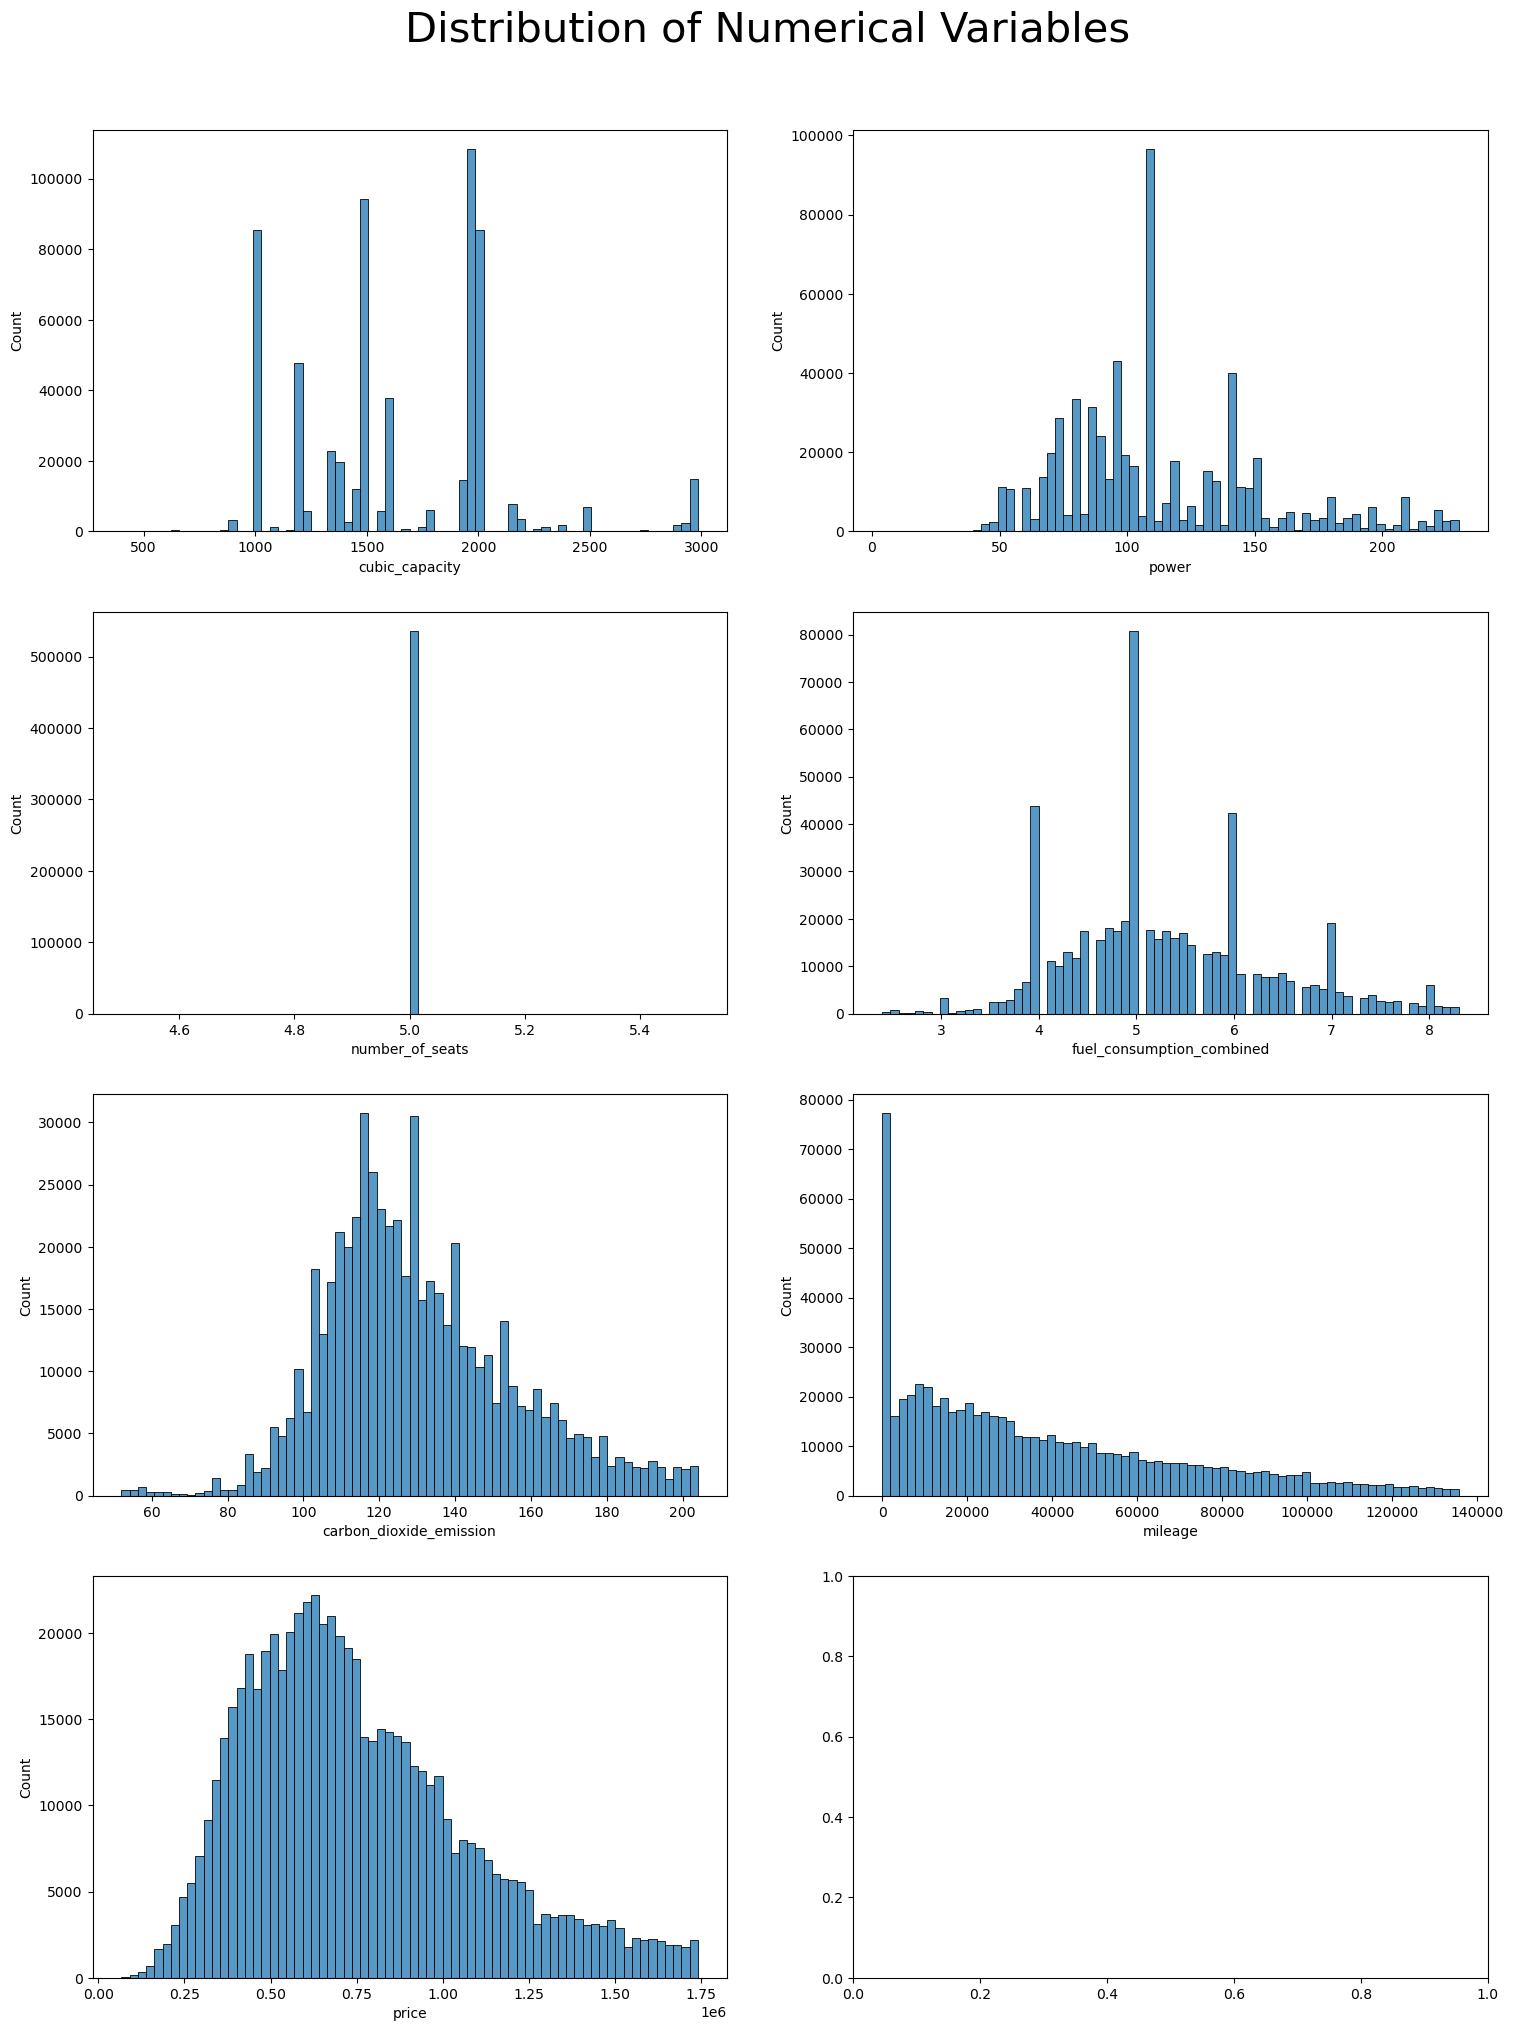

In [204]:
from functions import *
n_rows = math.ceil(len(numerical_cols_grid) / 2)
fig, axes = plt.subplots(nrows=n_rows, ncols=2, figsize=(18, 24))
fig.suptitle(
    'Distribution of Numerical Variables', 
    fontsize=fontsize_grid, 
    y=y_grid)
row_ind = 0
col_ind = -1
for ind in range(len(numerical_cols_grid)):
    row_ind = math.floor(ind / 2)
    col_ind += 1 
    data_filtered= filter_outliers(df=data, col=numerical_cols_grid[ind])
    sns.histplot(data=data_filtered, x=numerical_cols_grid[ind],
        ax=axes[row_ind, col_ind], bins=70)
    if col_ind == 1:
        col_ind = -1

We can also look at the distribution of individual numerical variables with filtered out outliers to better see the individual variables distributions. In case of cubic capacity, it can be seen that there only handfull of distinct  values that the observations attain, with most cars having cubic capacity of engine cylinder of 2 litres, followed by 1.5 litre and 1 litre. In case of power there is much higher variability but there is again one value of power which stands out - 110 kw with almost 100 000 observations. Fuel consumption distrubution resembles standard dsitribution with the mean approximately equating to 5 litres per 100 km. 

## Relationship between price and other variables

### Categorical Vars

c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\jziac\miniforge3\envs\ml_cars\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(d

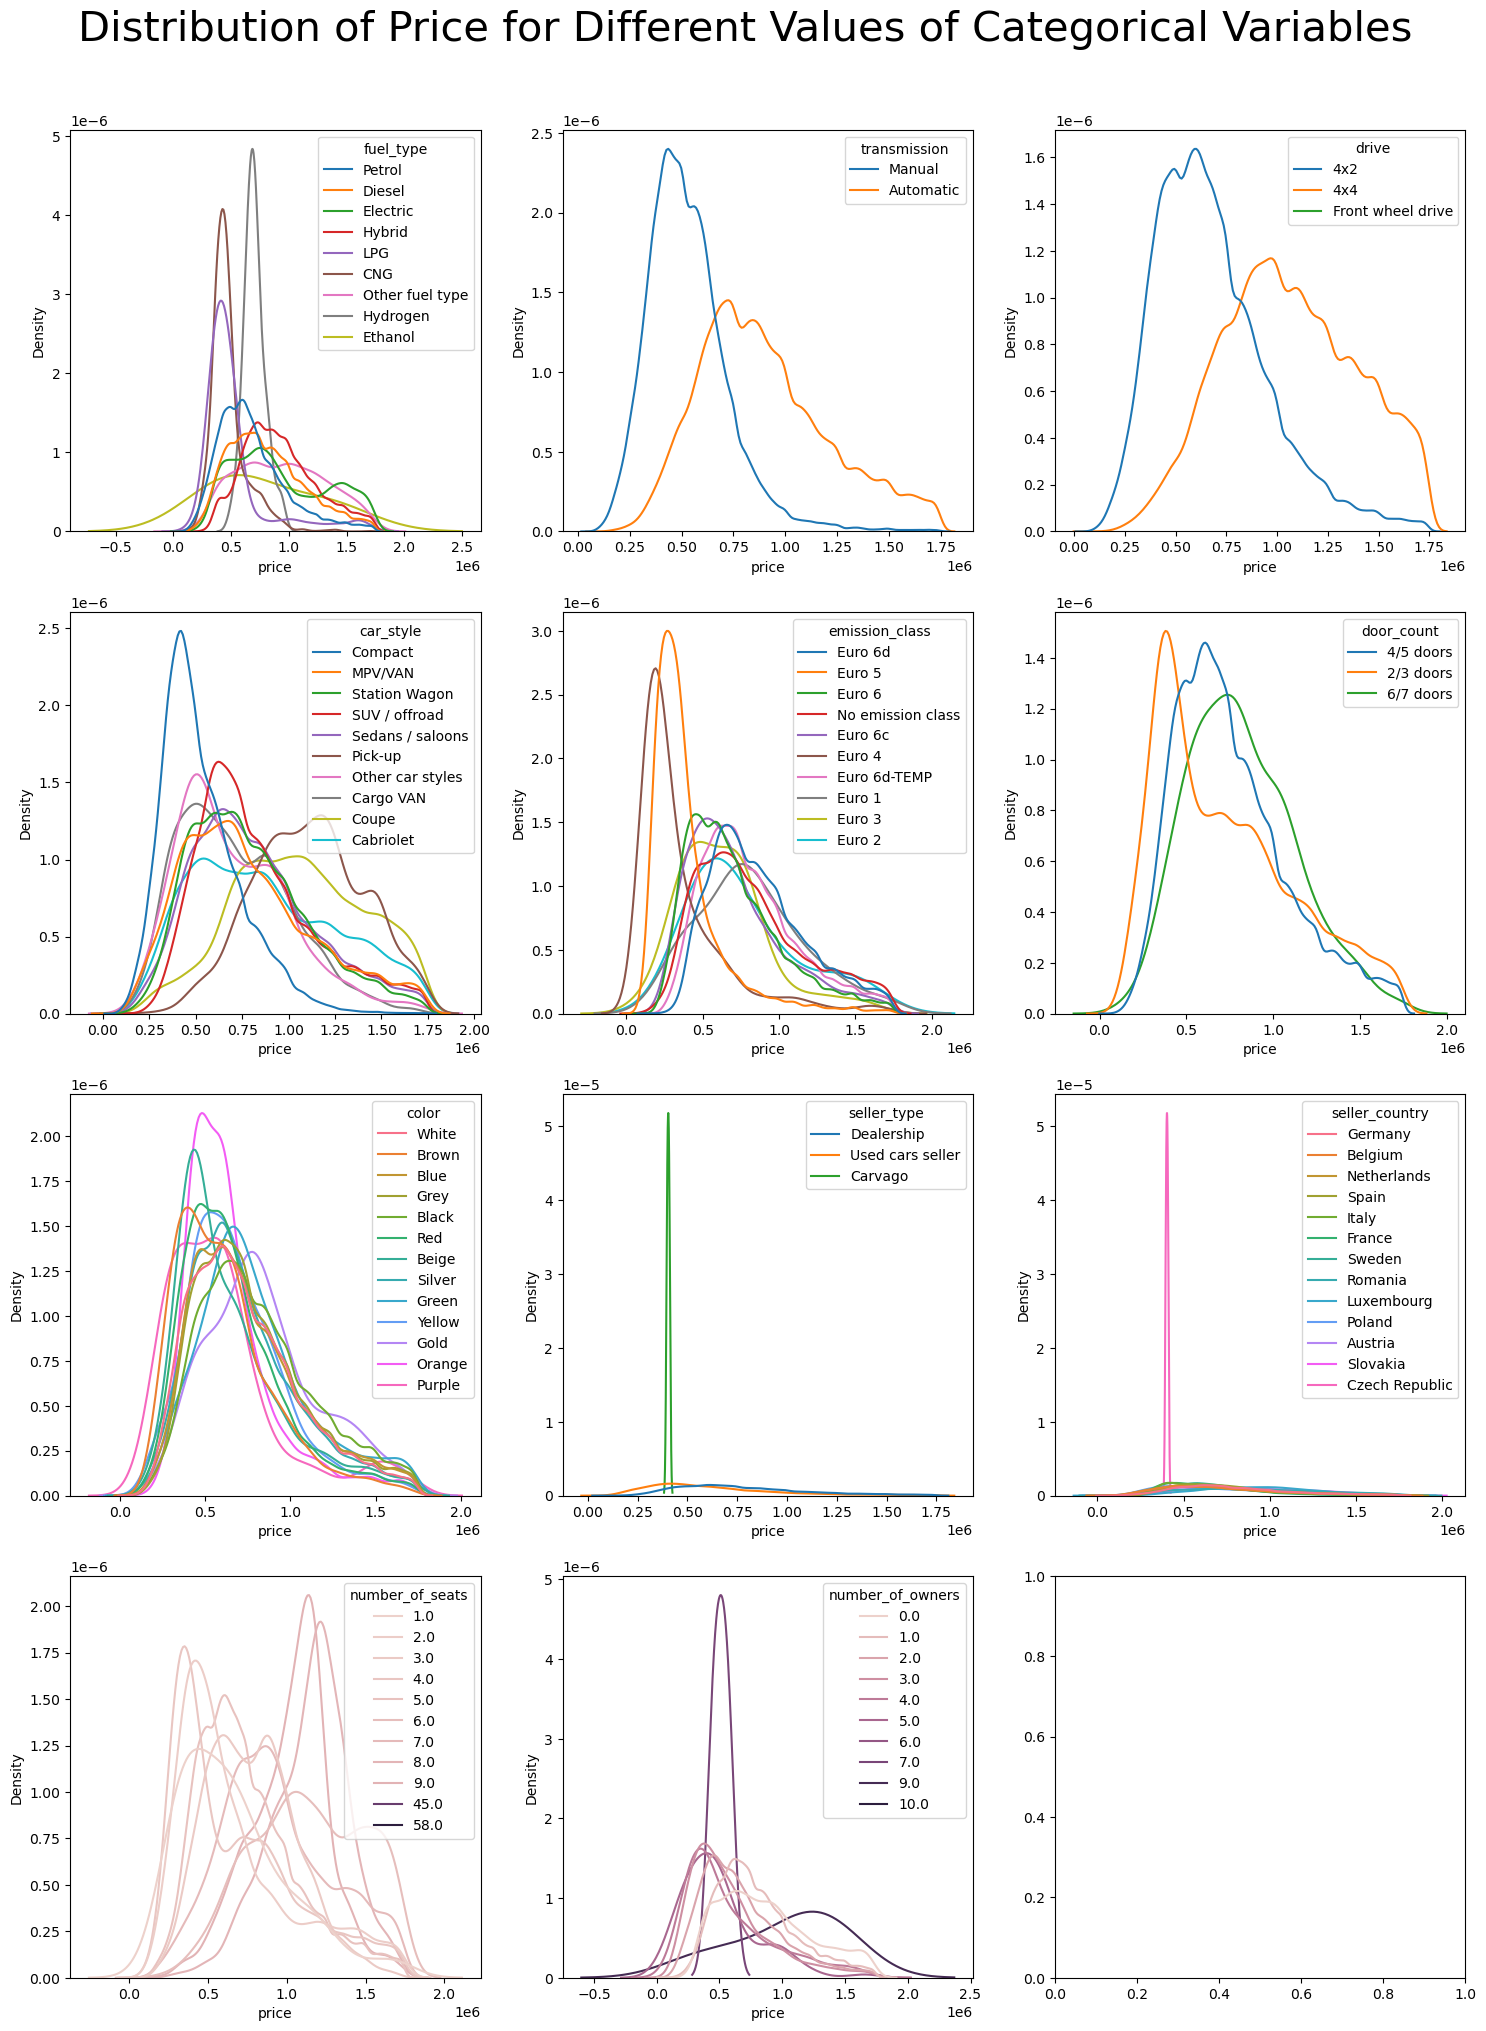

In [170]:
n_rows = math.ceil(len(cat_cols_grid) / 3)
fig, axes = plt.subplots(nrows=n_rows, ncols=3, figsize=(18, 24))
fig.suptitle(
    'Distribution of Price for Different Values of Categorical Variables', fontsize=fontsize_grid, 
    y=y_grid
    )
row_ind = 0
col_ind = -1
data_filtered = filter_outliers(df=data, col="price") 
for ind in range(len(cat_cols_grid)):
    row_ind = math.floor(ind / 3)
    col_ind += 1 
    sns.kdeplot(data=data_filtered, x="price", hue=cat_cols_grid[ind],
        ax=axes[row_ind, col_ind], common_norm=False)
    if col_ind == 2:
        col_ind = -1

We can see that the distribution of price for different values of categorical variables in some cases differs significantly. In case of emission standard this is most probably from big part drived by the correlation of the variable with the age of the vehicle and it is a question how much it will make difference all other variables held constant. On the other hand, for example,  in case of, variable describing the type of tranmission, there seems to be potential for it to explain significant portion of variation in price of vehicles. 

### Numerical Vars

cubic_capacity
power
fuel_consumption_combined
carbon_dioxide_emission
mileage
price
seller_rating


IndexError: index 7 is out of bounds for axis 0 with size 7

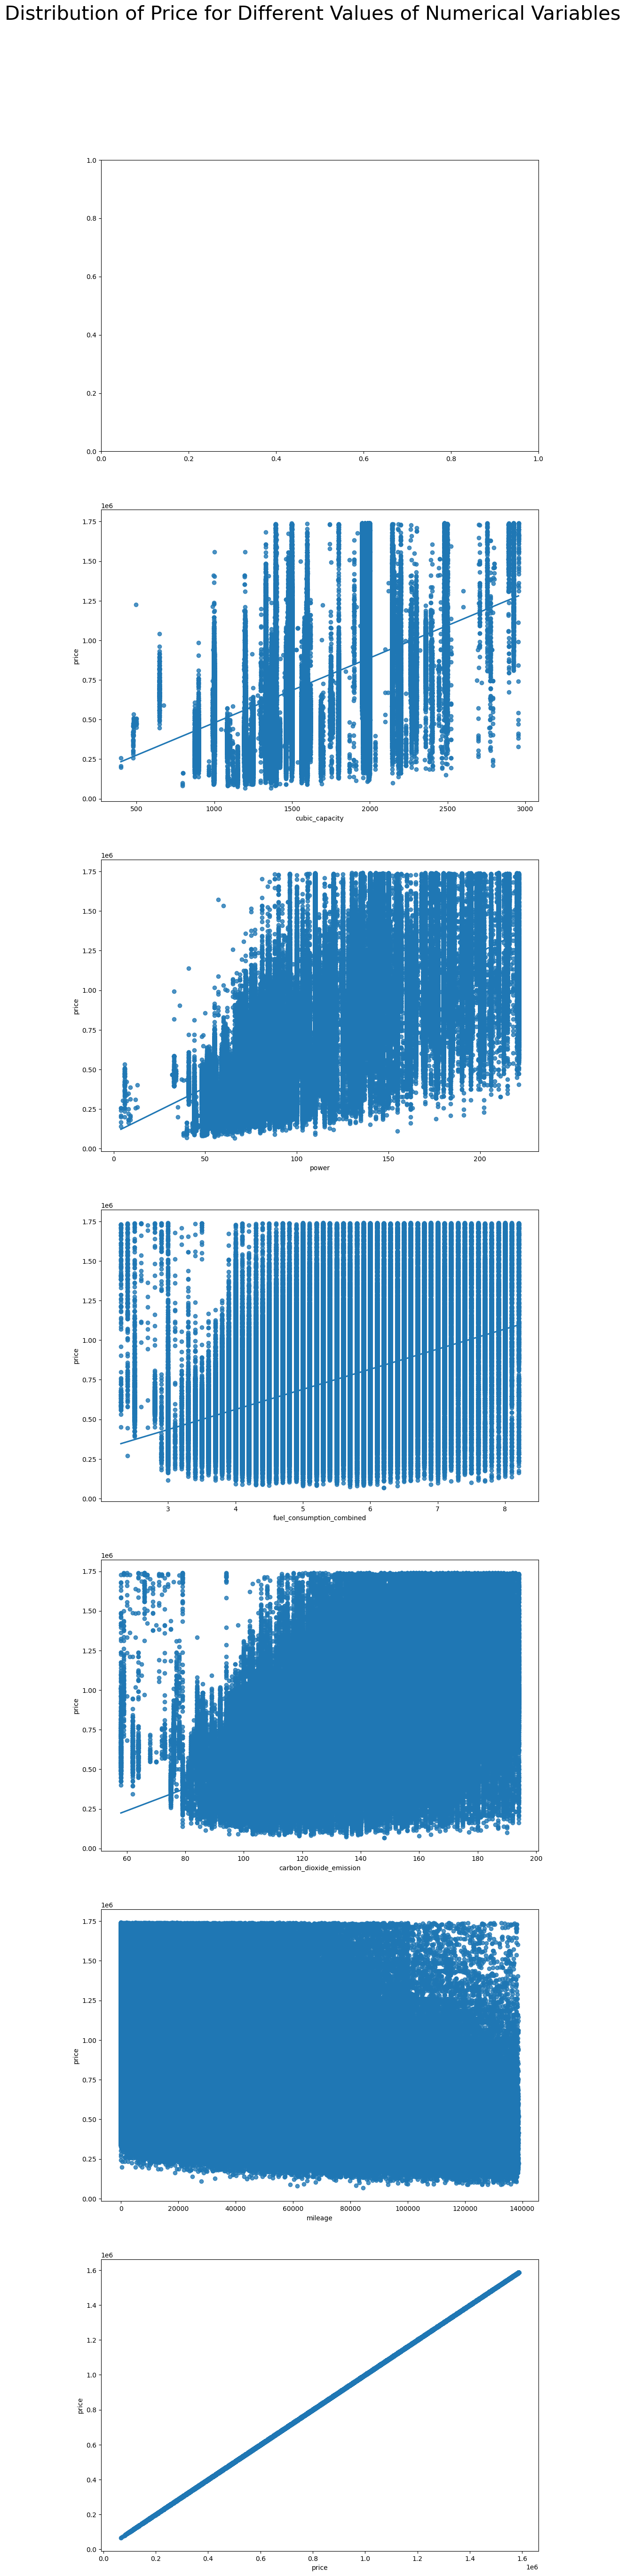

In [171]:
n_rows = math.ceil(len(int_col_names))
fig, axes = plt.subplots(nrows=n_rows, ncols=1, figsize=(12, 66))
fig.suptitle(
    'Distribution of Price for Different Values of Numerical Variables', fontsize=fontsize_grid, 
    y=y_grid
    )
row_ind = 0
col_ind = -1
df_filtered = filter_outliers(df=data, col="price") 
for ind in range(len(int_col_names)):
    print(int_col_names[ind])
    row_ind += 1
    df_filtered_2 = filter_outliers(df=data_filtered, col=int_col_names[ind])
    sns.regplot(data=df_filtered_2, x=int_col_names[ind],  y="price",
        ax=axes[row_ind]
        )

<Axes: xlabel='cubic_capacity', ylabel='price'>

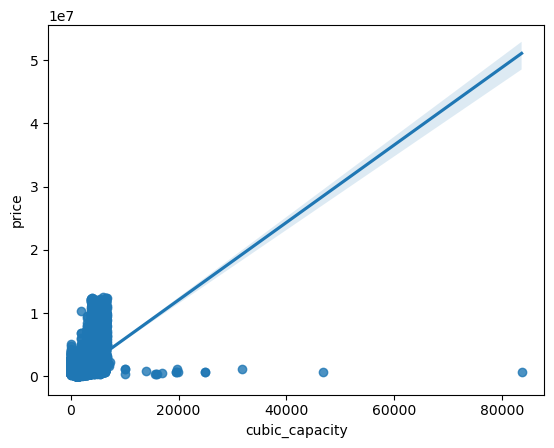

In [15]:
sns.regplot(data=data, x="cubic_capacity",  y="price")